In [1]:
from CNN_execution import ect_train_validate, report_trained_model, find_numpy_files
from CNN_execution import save_model, save_plots, roc_curve
import torch
import os
import numpy as np

c:\Users\manki\miniconda3\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Parameters required to define the model. 
# Will remain same throught the excerise.
 
NUM_EPOCHS = 50 # number of epochs to train the network for; type=int
LEARNING_RATE = 1e-3 # learning rate for training; type=float
# loss function
# lossfcn = nn.CrossEntropyLoss()

# device
device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# timeit.timeit(
#     '''
# trained_outputs = ect_train_validate(
#         10,10,'example_data/outline_input',log_level='None'
#     )
#     ''',
#     setup='from __main__ import ect_train_validate',
#     number=1
# )
num_dirs = 10
num_thresh = 5

classes = [
    i
        for i in os.listdir('data')
        if os.path.isdir(os.path.join('data', i))
]
class_items = {
    i: find_numpy_files(os.path.join('data', i))
        for i in classes
}

# print( "\n".join( [ f'{i}: {len(j)}' for i,j in class_items.items() ] ) )
# Select random 30 files for each classes, to make it run on my computer.
# You can remove this line to run on all files.
class_items = {
    i: np.random.choice(j, 30, replace=False)
        for i, j in class_items.items()
}
try:
    for i in find_numpy_files('example_data/outputs'):
        os.remove(i)
    os.remove('example_data/outputs/.ect_settings')
    for i in class_items:
        os.removedirs(os.path.join('example_data/outputs', i))
    
except FileNotFoundError:
    pass
print( "\n".join( [ f'{i}: {len(j)}' for i,j in class_items.items() ] ) )

Alstroemeria: 30
Apple: 30
Arabidopsis: 30
Brassica: 30
Coleus: 30
Cotton: 30
Grape: 30
Grass: 30
Ivy: 30
Leafsnap: 30
Passiflora: 30
Pepper: 30
Potato: 30
Tomato_: 30
Transect: 30
Viburnum: 30


In [4]:

trained_outputs = ect_train_validate(
    num_dirs=num_dirs,
    num_thresh=num_thresh,
    input_path=class_items,
    output_path='example_data/outputs',
    log_level='INFO'
)

# ThreadPool => 2 minutes 8.5 seconds vs 1 minute 7.5 seconds without ThreadPool.

['Alstroemeria', 'Apple', 'Arabidopsis', 'Brassica', 'Coleus', 'Cotton', 'Grape', 'Grass', 'Ivy', 'Leafsnap', 'Passiflora', 'Pepper', 'Potato', 'Tomato_', 'Transect', 'Viburnum']
num_classes= 16
ECT data; using only normalize, rotation transforms on training data
[INFO]: Epoch 1 of 50
Training
Validation
Training loss: 9.429, training acc: 5.469
Validation loss: 2.774, validation acc: 5.208

Best validation loss: 2.774134943882624

Saving best model for epoch: 1

--------------------------------------------------
[INFO]: Epoch 2 of 50
Training
Validation
Training loss: 2.752, training acc: 7.292
Validation loss: 2.761, validation acc: 7.292

Best validation loss: 2.761019378900528

Saving best model for epoch: 2

--------------------------------------------------
[INFO]: Epoch 3 of 50
Training
Validation
Training loss: 2.747, training acc: 5.729
Validation loss: 2.741, validation acc: 10.417

Best validation loss: 2.7413904269536338

Saving best model for epoch: 3

--------------------

In [5]:

save_model(
    trained_outputs["num_epochs"],
    trained_outputs["model"],
    trained_outputs["optimizer"],
    trained_outputs["lossfcn"]
)


Saving final model...


(<Figure size 1000x700 with 1 Axes>, <Figure size 1000x700 with 1 Axes>)

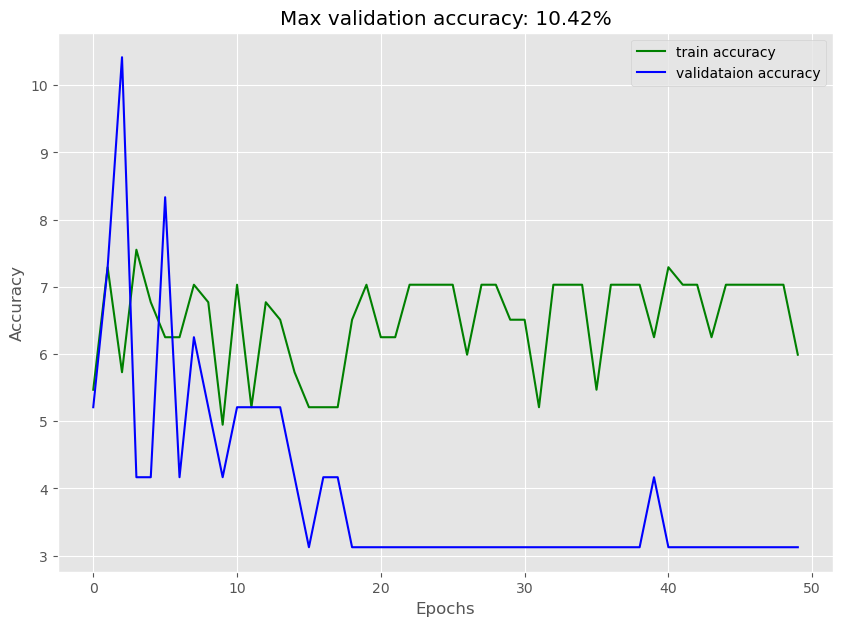

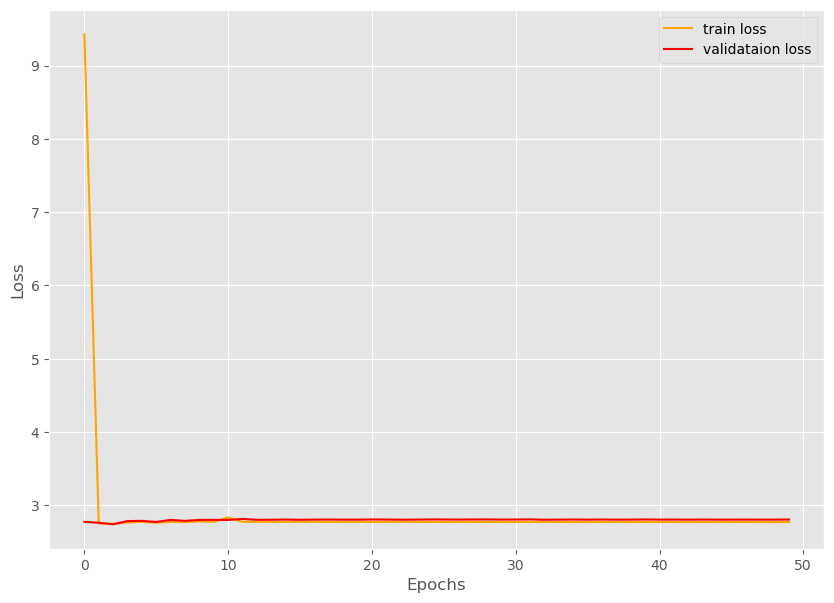

In [6]:

save_plots(
    
    trained_outputs["train_acc"],
    trained_outputs["valid_acc"],
    trained_outputs["train_loss"],
    trained_outputs["valid_loss"],
)

c:\Users\manki\OneDrive - Michigan State University\ECT-Dan Chitwood\ECT-Leaf-CNN\leaf-example-tutorial\CNN_execution.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=40, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=16, bias=True)
)
Using validation to compute confusion matrix


100%|██████████| 24/24 [00:00<00:00, 416.41it/s]

classes: ['Alstroemeria', 'Apple', 'Arabidopsis', 'Brassica', 'Coleus', 'Cotton', 'Grape', 'Grass', 'Ivy', 'Leafsnap', 'Passiflora', 'Pepper', 'Potato', 'Tomato_', 'Transect', 'Viburnum']



c:\Users\manki\miniconda3\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manki\miniconda3\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manki\miniconda3\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

Test Result:
Accuracy Score: 9.38%
_______________________________________________
CLASSIFICATION REPORT:
             0         1    2    3    4    5         6    7     8    9   10  \
precision  0.0  0.058824  0.0  0.0  0.0  0.0  0.363636  0.0   0.0  0.0  0.0   
recall     0.0  1.000000  0.0  0.0  0.0  0.0  0.800000  0.0   0.0  0.0  0.0   
f1-score   0.0  0.111111  0.0  0.0  0.0  0.0  0.500000  0.0   0.0  0.0  0.0   
support    4.0  5.000000  6.0  5.0  7.0  3.0  5.000000  6.0  13.0  6.0  6.0   

            11   12   13   14   15  accuracy  macro avg  weighted avg  
precision  0.0  0.0  0.0  0.0  0.0   0.09375   0.026404      0.022003  
recall     0.0  0.0  0.0  0.0  0.0   0.09375   0.112500      0.093750  
f1-score   0.0  0.0  0.0  0.0  0.0   0.09375   0.038194      0.031829  
support    6.0  6.0  5.0  7.0  6.0   0.09375  96.000000     96.000000  
_______________________________________________
Confusion Matrix: 
 [[ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0

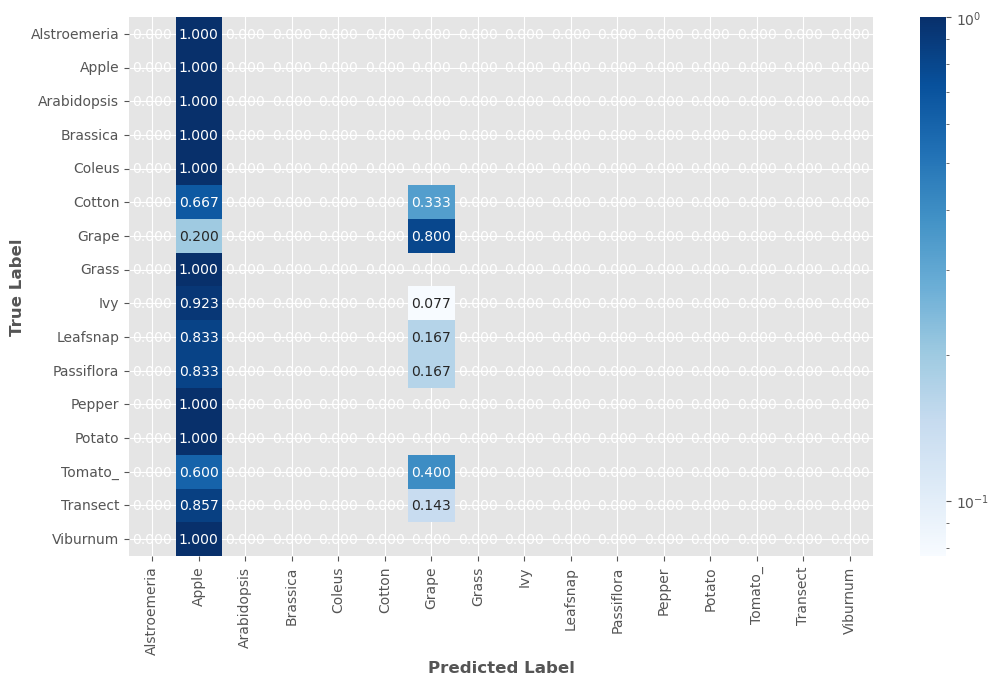

In [7]:

report_trained_model(
    num_dirs, num_thresh,
    trained_outputs["train_dataset"],
    trained_outputs["train_loader"],
    trained_outputs["test_loader"],
    trained_outputs["test_dataset"]
)

Using validation to compute ROC curve


100%|██████████| 24/24 [00:00<00:00, 229.59it/s]


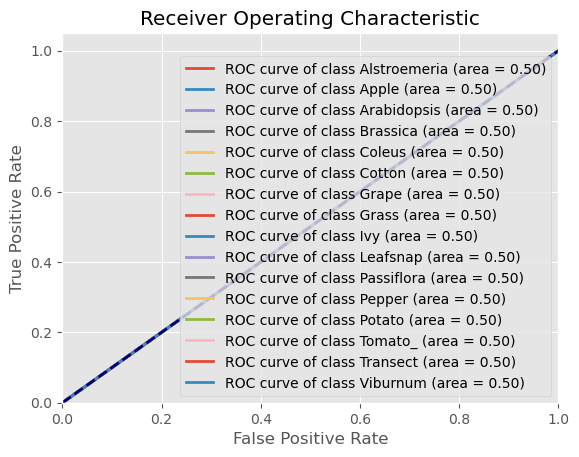

In [8]:
roc_curve( trained_outputs["model"], trained_outputs["test_loader"], trained_outputs["test_dataset"] )

The following python code will extract the data from the zip files in the data folder and put them in the appropriate folders. The code will create a folder for each class and extract all the class member zip files into that folder. The code will also handle the case where the class member zip files are named with a prefix of the class name.

```python

toplevel = [i for i in os.listdir('data') if not ( i.startswith('.') or i.startswith('2') ) and os.path.isfile(os.path.join('data',i)) ]
classes = {}
for i in toplevel:
    added = False
    i = i[:-4] # Remove the .zip
    for j in toplevel:
        if i == j[:-4]:
            continue
        common = os.path.commonprefix([i,j])
        if len(common) > 5:
            added = True
            classes[common] = classes.get(common,[]) + [j]
    if not added:
        classes[i] = classes.get(i,[]) + [i+'.zip']
[os.makedirs(os.path.join('data',i), exist_ok=True) for i in classes]

import zipfile as zp

for folder, zipfiles in classes.items():
    for z in zipfiles:
        with zp.ZipFile(os.path.join('data',z), 'r') as f:
            names = f.namelist()
            for name in names:
                if name.endswith('.npy'):
                    f.extract(name, os.path.join('data',folder))